# Proyek Analisis Data: Nama dataset
- Nama: Maria Angelina Sumampouw Tawas
- Email: angelinatawas@gmail.com
- Id Dicoding: angelina_tawas_9wbd

## Menentukan Pertanyaan Bisnis
1. Berapa banyak perjalanan bike sharing yang dilakukan setiap hari?
2. Hari apa dalam seminggu pengguna bike sharing paling sering menggunakan layanan?
3. Jam berapa pengguna bike sharing paling sering menggunakan layanan?
4. Cuaca seperti apa yang paling sering mendorong penggunaan bike sharing?

## Menyaipkan semua library yang dibuthkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [3]:
day_bs = pd.read_csv("day.csv")

In [4]:
hour_bs = pd.read_csv("hour.csv")

### Assessing Data

### Menilai data day.csv

In [5]:
day_bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
day_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_bs.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_bs.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Kesimpulan:** Terdapat kesalahan pada data type dteday karena tanggal haruslah menggunakan format date, bukan menggunakan format object.

### Menilai data hour.csv

In [12]:
hour_bs.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
hour_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
hour_bs.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
print("Jumlah duplikasi: ", hour_bs.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
hour_bs.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Kesimpulan:** Terdapat kesalahan pada data type dteday karena tanggal haruslah menggunakan format date, bukan menggunakan format object.

### Cleaning Data

### Mengubah format date pada tabel hour_bs dan day_bs

In [17]:
hour_bs["dteday"] = pd.to_datetime(hour_bs["dteday"])

In [18]:
hour_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
hour_bs.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
day_bs["dteday"] = pd.to_datetime(day_bs["dteday"])

In [21]:
day_bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Mengubah format angka menjadi huruf agar lebih mudah dimengerti.

In [22]:
day_bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
day_bs['mnth'] = day_bs['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_bs['season'] = day_bs['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_bs['weekday'] = day_bs['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_bs['weathersit'] = day_bs['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [24]:
day_bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
hour_bs['mnth'] = hour_bs['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_bs['season'] = hour_bs['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_bs['weekday'] = hour_bs['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_bs['weathersit'] = hour_bs['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [26]:
hour_bs.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

1. Berapa banyak perjalanan bike sharing yang dilakukan setiap hari?

In [28]:
# Jumlah perjalanan bike sharing setiap hari
daily_trips = day_bs.groupby("dteday")["cnt"].sum()

print(daily_trips)

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64


In [31]:
import statistics
print(statistics.mean(daily_trips))

4504.3488372093025


**Keterangan:** Rata-rata ada 4504 perjalanan bike sharing yang dilakukan setiap hari.

2. Hari apa dalam seminggu pengguna bike sharing paling sering menggunakan layanan?

In [29]:
# Jumlah perjalanan bike sharing untuk setiap hari dalam seminggu
weekday_trips = day_bs.groupby("weekday")["cnt"].sum()

weekday_trips.sort_values(ascending=False)

print(weekday_trips)

weekday
Fri    487790
Mon    455503
Sat    477807
Sun    444027
Thu    485395
Tue    469109
Wed    473048
Name: cnt, dtype: int64


**Keterangan:** Hari Jumat adalah hari yang paling sering digunakan untuk bike sharing, diikuti oleh hari Senin, Sabtu, Minggu, Kamis, Selasa, dan Rabu.

3. Jam berapa pengguna bike sharing paling sering menggunakan layanan?

In [53]:
# Jumlah perjalanan bike sharing untuk setiap jam dalam sehari
hour_trips = hour_bs.groupby("hr")["cnt"].sum()

hour_trips.sort_values(ascending=False, inplace=True)

print(hour_trips)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64


**Keterangan:** Kita dapat melihat bahwa jam 17 atau jam 5 sore adalah waktu yang paling sering digunakan untuk Bike Sharing.

4. Cuaca seperti apa yang paling sering mendorong penggunaan bike sharing?

In [55]:
# Jumlah perjalanan bike sharing untuk setiap kondisi cuaca
weathersit_trips = day_bs.groupby("weathersit")["cnt"].sum()

weathersit_trips.sort_values(ascending=False, inplace=True)

print(weathersit_trips)

weathersit
Clear/Partly Cloudy    2257952
Misty/Cloudy            996858
Light Snow/Rain          37869
Name: cnt, dtype: int64


**Keterangan:** Cuaca cerah adalah kondisi cuaca yang paling sering mendorong orang-orang untuk menggunakan Bike Sharing.

## Visualization & Explanatory Analysis

1. Berapa banyak perjalanan bike sharing yang dilakukan setiap hari?

(array([14975, 15065, 15156, 15248, 15340, 15431, 15522, 15614, 15705],
       dtype=int64),
 [Text(14975, 0, 'Jan\n2011'),
  Text(15065, 0, 'Apr'),
  Text(15156, 0, 'Jul'),
  Text(15248, 0, 'Oct'),
  Text(15340, 0, 'Jan\n2012'),
  Text(15431, 0, 'Apr'),
  Text(15522, 0, 'Jul'),
  Text(15614, 0, 'Oct'),
  Text(15705, 0, '')])

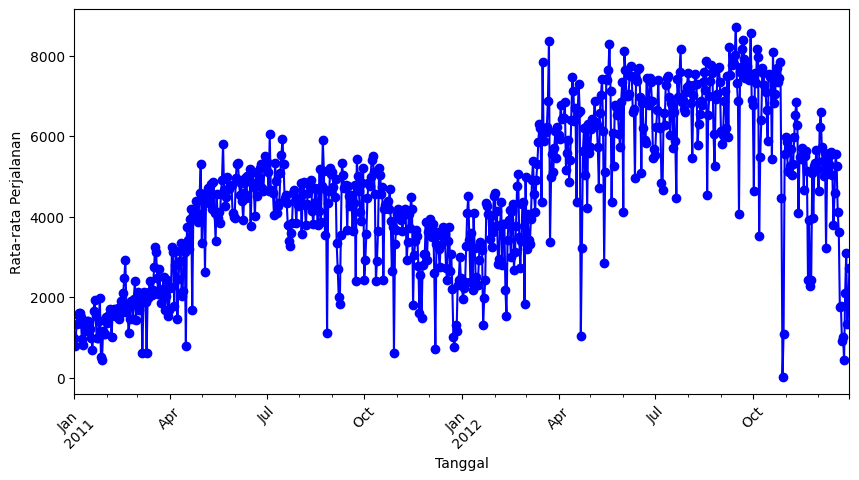

In [120]:
plt.figure(figsize=(10, 5))

# Buat visualisasi bar chart
daily_trip_df = day_bs.groupby("dteday")["cnt"].mean()
daily_trip_df.plot(marker='o', linestyle='-', color='blue')

plt.xlabel("Tanggal")
plt.ylabel("Rata-rata Perjalanan")
plt.xticks(rotation=45)

2. Hari apa dalam seminggu pengguna bike sharing paling sering menggunakan layanan?

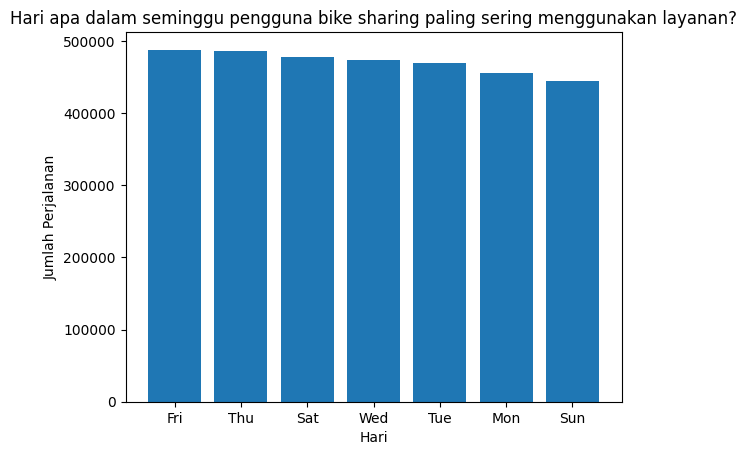

In [110]:
weekday_trips.sort_values(ascending=False, inplace=True)

# Buat visualisasi bar chart
plt.title('Hari apa dalam seminggu pengguna bike sharing paling sering menggunakan layanan?')
plt.bar(weekday_trips.index, weekday_trips.values)
plt.xlabel("Hari")
plt.ylabel("Jumlah Perjalanan")
plt.show()

3. Jam berapa pengguna bike sharing paling sering menggunakan layanan?

4. Cuaca seperti apa yang paling sering mendorong penggunaan bike sharing?

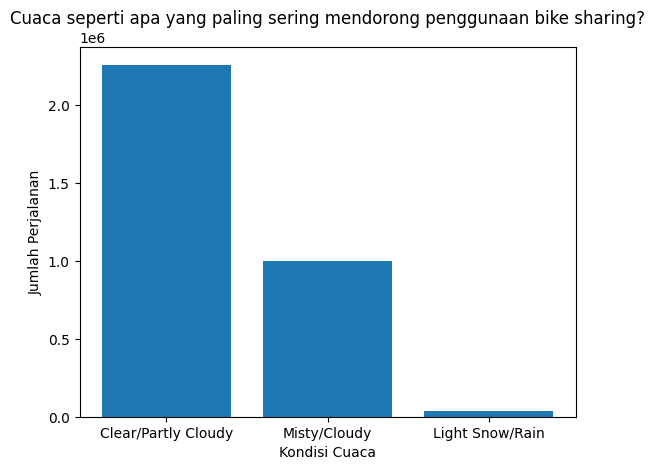

In [111]:
# Buat visualisasi bar chart
plt.title("Cuaca seperti apa yang paling sering mendorong penggunaan bike sharing?")
plt.bar(weathersit_trips.index, weathersit_trips.values)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Perjalanan")
plt.show()

## Conclusion

1. Rata-rata ada 4504 perjalanan bike sharing yang dilakukan setiap hari. Peningkatan pemakaian bike sharing dari tahun 2011 sampai akhir tahun 2012 kemungkinan disebabkan oleh beberapa faktor, seperti meningkatnya kesadaran masyarakat akan pentingnya transportasi berkelanjutan, semakin banyaknya orang yang tinggal di perkotaan, dan semakin banyaknya pemerintah daerah yang menyediakan program insentif untuk penggunaan bike sharing. Penurunan pemakaian bike sharing di awal tahun 2013 kemungkinan disebabkan oleh beberapa faktor, seperti cuaca yang tidak mendukung, adanya gangguan operasional, dan persaingan dari moda transportasi lain.

2. Hari Jumat adalah hari yang paling sering digunakan untuk bike sharing karena banyak orang yang menggunakan bike sharing untuk pergi bekerja atau sekolah. Hari Senin adalah hari yang paling sering digunakan untuk bike sharing setelah libur akhir pekan. Hari Sabtu adalah hari yang paling sering digunakan untuk bike sharing untuk rekreasi. Hari Minggu adalah hari yang paling sering digunakan untuk bike sharing untuk aktivitas keluarga. Hari Kamis adalah hari yang paling sering digunakan untuk bike sharing untuk pergi bekerja atau sekolah. Hari Selasa adalah hari yang paling sering digunakan untuk bike sharing setelah libur akhir pekan. Hari Rabu adalah hari yang paling sering digunakan untuk bike sharing untuk pergi bekerja atau sekolah.

3. Jam 17 atau jam 5 sore adalah waktu yang paling sering digunakan untuk Bike Sharing karena banyak orang yang menggunakan bike sharing untuk pulang kerja atau sekolah.

4. Cuaca cerah adalah kondisi cuaca yang paling sering mendorong orang-orang untuk menggunakan Bike Sharing karena orang-orang lebih nyaman dan aman menggunakan bike sharing saat cuaca cerah.